In [1]:
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint

from sheet_id.models.FCN import FCN
from sheet_id.utils.loss_functions import softmax_sparse_crossentropy_ignoring_background, softmax_sparse_crossentropy
from sheet_id.utils.metrics import sparse_accuracy_ignoring_background, sparse_accuracy
from sheet_id.utils.dataPreprocessing import splitTrainValidation
from sheet_id.utils.dataGenerator import DataGenerator

import matplotlib.pyplot as plt
import numpy as np

/home/mirlab/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Training

In [2]:
model = FCN(input_shape=(250,250,1), n_classes=124)

In [3]:
loss_fn = softmax_sparse_crossentropy
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, 
                 epsilon=1e-8, decay=0.0, amsgrad=False)
metrics = [sparse_accuracy]
model.compile(loss=loss_fn, optimizer=optimizer, metrics=metrics)

In [4]:
callbacks = []

In [5]:
train_partition, validation_partition = splitTrainValidation('../data/', max_size=200, test_size=20, npy_only=True)

In [6]:
params = {'dim': (250,250),
          'batch_size': 20,
          'n_classes': 124,
          'n_channels': 1,
          'shuffle': True,
          'crop': True,
          'crop_size': (250,250),
          'load_npy': True}
training_generator = DataGenerator(train_partition, **params)
validation_generator = DataGenerator(validation_partition, **params)

In [36]:
history = model.fit_generator(generator=training_generator, epochs=200,
                              validation_data=validation_generator,
                              use_multiprocessing=True, workers=10,
                              callbacks=callbacks,
                              steps_per_epoch=10)

Epoch 1/200
10/10 [==============================] - 16s 2s/step - loss: 0.0073 - sparse_accuracy: 0.9981 - val_loss: 0.0046 - val_sparse_accuracy: 0.9987
Epoch 2/200
10/10 [==============================] - 14s 1s/step - loss: 0.0084 - sparse_accuracy: 0.9978 - val_loss: 0.0035 - val_sparse_accuracy: 0.9989
Epoch 3/200
10/10 [==============================] - 14s 1s/step - loss: 0.0075 - sparse_accuracy: 0.9977 - val_loss: 0.0105 - val_sparse_accuracy: 0.9973
Epoch 4/200
10/10 [==============================] - 14s 1s/step - loss: 0.0079 - sparse_accuracy: 0.9980 - val_loss: 0.0030 - val_sparse_accuracy: 0.9989
Epoch 5/200
10/10 [==============================] - 14s 1s/step - loss: 0.0090 - sparse_accuracy: 0.9976 - val_loss: 0.0059 - val_sparse_accuracy: 0.9980
Epoch 6/200
10/10 [==============================] - 14s 1s/step - loss: 0.0087 - sparse_accuracy: 0.9975 - val_loss: 0.0115 - val_sparse_accuracy: 0.9967
Epoch 7/200
10/10 [==============================] - 14s 1s/step - los

Epoch 53/200
10/10 [==============================] - 14s 1s/step - loss: 0.0061 - sparse_accuracy: 0.9983 - val_loss: 0.0104 - val_sparse_accuracy: 0.9973
Epoch 54/200
10/10 [==============================] - 15s 1s/step - loss: 0.0054 - sparse_accuracy: 0.9984 - val_loss: 0.0086 - val_sparse_accuracy: 0.9977
Epoch 55/200
10/10 [==============================] - 14s 1s/step - loss: 0.0081 - sparse_accuracy: 0.9980 - val_loss: 0.0106 - val_sparse_accuracy: 0.9968
Epoch 56/200
10/10 [==============================] - 14s 1s/step - loss: 0.0052 - sparse_accuracy: 0.9984 - val_loss: 0.0115 - val_sparse_accuracy: 0.9969
Epoch 57/200
10/10 [==============================] - 14s 1s/step - loss: 0.0080 - sparse_accuracy: 0.9978 - val_loss: 0.0138 - val_sparse_accuracy: 0.9955
Epoch 58/200
10/10 [==============================] - 14s 1s/step - loss: 0.0087 - sparse_accuracy: 0.9976 - val_loss: 0.0081 - val_sparse_accuracy: 0.9983
Epoch 59/200
10/10 [==============================] - 14s 1s/ste

10/10 [==============================] - 14s 1s/step - loss: 0.0050 - sparse_accuracy: 0.9985 - val_loss: 0.0041 - val_sparse_accuracy: 0.9987
Epoch 106/200
10/10 [==============================] - 14s 1s/step - loss: 0.0061 - sparse_accuracy: 0.9981 - val_loss: 0.0047 - val_sparse_accuracy: 0.9986
Epoch 107/200
10/10 [==============================] - 14s 1s/step - loss: 0.0048 - sparse_accuracy: 0.9986 - val_loss: 0.0165 - val_sparse_accuracy: 0.9961
Epoch 108/200
10/10 [==============================] - 15s 1s/step - loss: 0.0081 - sparse_accuracy: 0.9979 - val_loss: 0.0035 - val_sparse_accuracy: 0.9991
Epoch 109/200
10/10 [==============================] - 14s 1s/step - loss: 0.0047 - sparse_accuracy: 0.9986 - val_loss: 0.0039 - val_sparse_accuracy: 0.9990
Epoch 110/200
10/10 [==============================] - 14s 1s/step - loss: 0.0070 - sparse_accuracy: 0.9981 - val_loss: 0.0047 - val_sparse_accuracy: 0.9984
Epoch 111/200
10/10 [==============================] - 14s 1s/step - los

10/10 [==============================] - 14s 1s/step - loss: 0.0057 - sparse_accuracy: 0.9984 - val_loss: 0.0024 - val_sparse_accuracy: 0.9992
Epoch 158/200
10/10 [==============================] - 14s 1s/step - loss: 0.0045 - sparse_accuracy: 0.9987 - val_loss: 0.0079 - val_sparse_accuracy: 0.9981
Epoch 159/200
10/10 [==============================] - 14s 1s/step - loss: 0.0046 - sparse_accuracy: 0.9986 - val_loss: 0.0036 - val_sparse_accuracy: 0.9989
Epoch 160/200
10/10 [==============================] - 14s 1s/step - loss: 0.0067 - sparse_accuracy: 0.9980 - val_loss: 0.0047 - val_sparse_accuracy: 0.9984
Epoch 161/200
10/10 [==============================] - 14s 1s/step - loss: 0.0061 - sparse_accuracy: 0.9983 - val_loss: 0.0038 - val_sparse_accuracy: 0.9989
Epoch 162/200
10/10 [==============================] - 15s 1s/step - loss: 0.0060 - sparse_accuracy: 0.9982 - val_loss: 0.0043 - val_sparse_accuracy: 0.9988
Epoch 163/200
10/10 [==============================] - 14s 1s/step - los

In [38]:
# model.save_weights('../checkpoints/working_fcn.h5')

In [39]:
model.load_weights('../checkpoints/working_fcn.h5')

# Visualization

In [28]:
example_img, example_annotation = training_generator[0]

In [40]:
model.evaluate(example_img, example_annotation)

20/20 [==============================] - 1s 27ms/step


[0.008024616166949272, 0.998199999332428]

In [55]:
prediction = model.predict(example_img)
prediction = np.argmax(prediction, axis=-1)
prediction.shape

(20, 250, 250)

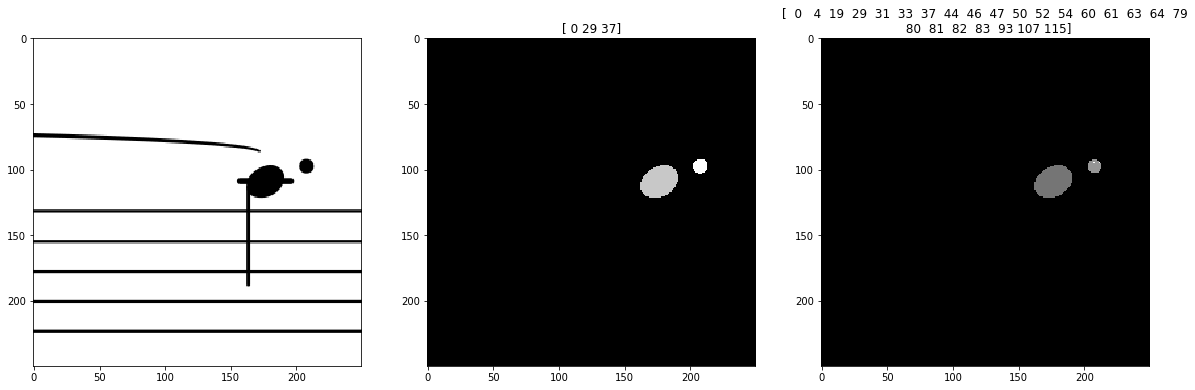

In [56]:
img_id = 12
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(example_img[img_id,:,:,0], cmap='gray')
plt.subplot(1,3,2)
plt.imshow(example_annotation[img_id,:,:,0], cmap='gray')
plt.title(np.unique(example_annotation[img_id,:,:,0]))
plt.subplot(1,3,3)
plt.imshow(prediction[img_id,:,:], cmap='gray')
plt.title(np.unique(prediction))
plt.show()

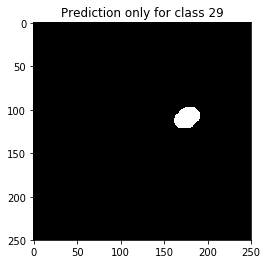

In [60]:
mask = 29
masked = np.zeros_like(prediction[img_id, :, :])
for row in range(prediction.shape[1]):
    for col in range(prediction.shape[2]):
        if prediction[img_id, row, col] == mask:
            masked[row, col] = 255
        else:
            masked[row, col] = 0

plt.imshow(masked, cmap='gray')
plt.title('Prediction only for class {:}'.format(mask))
plt.show()